In [5]:
import numpy as np
from scipy.signal import convolve2d

#дополнение множества
def complement(f):
    return 1 - f

#расширение множества через свёртку
def dilation(a, b):
    a = np.ndarray.astype(a, np.int32)
    b = np.ndarray.astype(b, np.int32)
    return convolve2d(a, b, 'same', boundary='symm') > 0

#эррозия множества
def erosion(a, b):
    return complement(dilation(complement(a), b))

#отмыкание
def opening(a, b):
    return dilation(erosion(a, b), b)

#замыкание
def closing(a, b):
    return erosion(dilation(a, b), b)

def is_empty(a):
    return np.all(a == 0)

In [6]:
#'крестик в кружочке'
def cross_operation(x, a, b):
    return np.logical_and(erosion(x, a), erosion(complement(x), b))

#Утолщения
def thickening(x, t):
    return np.logical_or(x, cross_operation(x, t[0], t[1]))

#Операция утоньшения
def thinning(x, t):
    return np.logical_and(x, np.logical_not(cross_operation(x, t[0], t[1])))

#Скелетизация утоньшением
def thin_skelet(x, ts):
    x_prev = np.zeros(shape = x.shape)
    while (np.any(x != x_prev)):
        x_prev = x
        for t in ts:
            x = thinning(x, t)
    return x

Маски

In [7]:
ts = [
    #T1
    (np.array([[1, 1, 1],
               [0, 1, 0],
               [0, 0, 0]]),

     np.array([[0, 0, 0],
               [0, 0, 0],
               [1, 1, 1]])),

    #T2
    (np.array([[1, 0, 0],
               [1, 1, 0],
               [1, 0, 0]]),

     np.array([[0, 0, 1],
               [0, 0, 1],
               [0, 0, 1]])),

    #T3
    (np.array([[0, 0, 0],
               [0, 1, 0],
               [1, 1, 1]]),

     np.array([[1, 1, 1],
               [0, 0, 0],
               [0, 0, 0]])),

    #T4
    (np.array([[0, 0, 1],
               [0, 1, 1],
               [0, 0, 1]]),

     np.array([[1, 0, 0],
               [1, 0, 0],
               [1, 0, 0]])),

    #T5
    (np.array([[0, 1, 0],
               [0, 1, 1],
               [0, 0, 0]]),

     np.array([[0, 0, 0],
               [1, 0, 0],
               [1, 1, 0]])),

    #T6
    (np.array([[0, 1, 0],
               [1, 1, 0],
               [0, 0, 0]]),

     np.array([[0, 0, 0],
               [0, 0, 1],
               [0, 1, 1]])),

    #T7
    (np.array([[0, 0, 0],
               [1, 1, 0],
               [0, 1, 0]]),

     np.array([[0, 1, 1],
               [0, 0, 1],
               [0, 0, 0]])),

    #T8
    (np.array([[0, 0, 0],
               [0, 1, 1],
               [0, 1, 0]]),

     np.array([[1, 1, 0],
               [1, 0, 0],
               [0, 0, 0]]))
]

Результаты

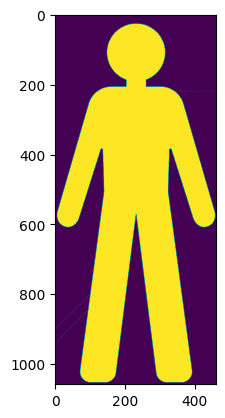

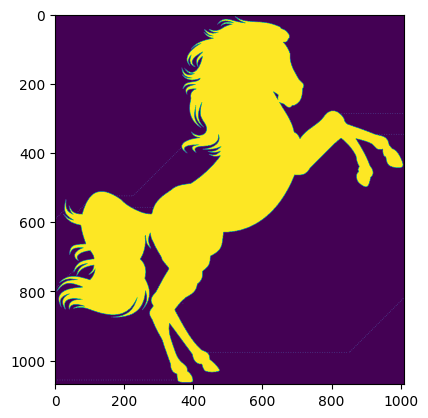

In [8]:
from PIL import Image
import matplotlib.pyplot as plt

def load_image(path):
    image = Image.open(path)
    arr = np.asarray(image)
    return np.any(arr < 255, axis = 2)

im1 = load_image("im1.png")
im2 = load_image("im2.png")

plt.imshow(im1)
plt.show()
plt.imshow(im2)
plt.show()

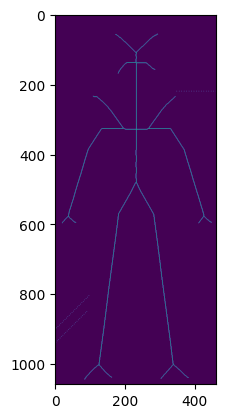

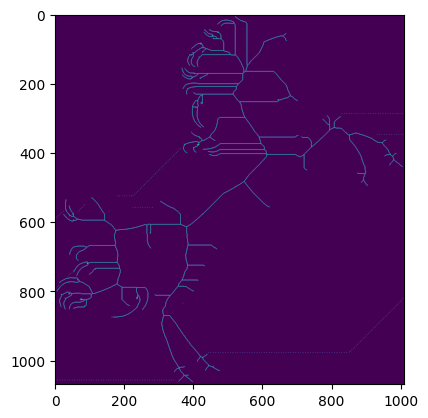

In [9]:
plt.imshow(thin_skelet(im1, ts))
plt.show()
plt.imshow(thin_skelet(im2, ts))
plt.show()